<a href="https://colab.research.google.com/github/Nivash7/assignment_1/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.preprocessing as OneHotEncoder
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer


from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [62]:
df = pd.read_csv("Customer Conversion Prediction.csv")
pd.set_option('display.max_columns',None)

print(df)
df.head()

       age           job   marital education_qual  call_type  day  mon   dur  \
0       58    management   married       tertiary    unknown    5  may   261   
1       44    technician    single      secondary    unknown    5  may   151   
2       33  entrepreneur   married      secondary    unknown    5  may    76   
3       47   blue-collar   married        unknown    unknown    5  may    92   
4       33       unknown    single        unknown    unknown    5  may   198   
...    ...           ...       ...            ...        ...  ...  ...   ...   
45206   51    technician   married       tertiary   cellular   17  nov   977   
45207   71       retired  divorced        primary   cellular   17  nov   456   
45208   72       retired   married      secondary   cellular   17  nov  1127   
45209   57   blue-collar   married      secondary  telephone   17  nov   508   
45210   37  entrepreneur   married      secondary   cellular   17  nov   361   

       num_calls prev_outcome    y  
0 

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [63]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [64]:
df.shape

(45211, 11)

In [65]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [66]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [67]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [68]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


In [69]:
df.tail()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
45206,51,technician,married,tertiary,cellular,17,nov,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,nov,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,nov,508,4,unknown,no
45210,37,entrepreneur,married,secondary,cellular,17,nov,361,2,other,no


In [70]:
print(f'This Customer Conversion Prediction DataFrame contains {df.shape[0]} rows and {df.shape[1]} columns.')

This Customer Conversion Prediction DataFrame contains 45211 rows and 11 columns.


In [71]:
#handling missing values
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [72]:
print("This Customer Conversion Prediction DataFrame contains '0(zero)' Null Value")

This Customer Conversion Prediction DataFrame contains '0(zero)' Null Value


In [73]:
pd.DataFrame(df.isna().mean()*100).T

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: age, Length: 77, dtype: int64

In [75]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [76]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [77]:
df['education_qual'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [78]:
df['call_type'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [79]:
df['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [80]:
df['mon'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [81]:
df['dur'].value_counts()

124     188
90      184
89      177
104     175
122     175
       ... 
1833      1
1545      1
1352      1
1342      1
1556      1
Name: dur, Length: 1573, dtype: int64

In [82]:
df['num_calls'].value_counts()

1     17544
2     12505
3      5521
4      3522
5      1764
6      1291
7       735
8       540
9       327
10      266
11      201
12      155
13      133
14       93
15       84
16       79
17       69
18       51
19       44
20       43
21       35
22       23
25       22
23       22
24       20
29       16
28       16
26       13
31       12
27       10
32        9
30        8
33        6
34        5
36        4
35        4
43        3
38        3
37        2
50        2
41        2
46        1
58        1
55        1
63        1
51        1
39        1
44        1
Name: num_calls, dtype: int64

In [83]:
df['prev_outcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [84]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [85]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [86]:
df.job.values

array(['management', 'technician', 'entrepreneur', ..., 'retired',
       'blue-collar', 'entrepreneur'], dtype=object)

In [87]:
df.rename(columns = {'mon':'month','dur':'duration','education_qual':'qualification','y':'final_prediction'}, inplace = True)

In [88]:
df.columns

Index(['age', 'job', 'marital', 'qualification', 'call_type', 'day', 'month',
       'duration', 'num_calls', 'prev_outcome', 'final_prediction'],
      dtype='object')

In [89]:
outliers = []

def detect_outliers(data):

  threshold = 4
  mean = np.mean(data)
  std = np.std(data)
  
  for i in data:
    z_score=(i - mean)/std
    if np.abs(z_score) >threshold:
      outliers.append(y)
  return outliers

ValueError: ignored

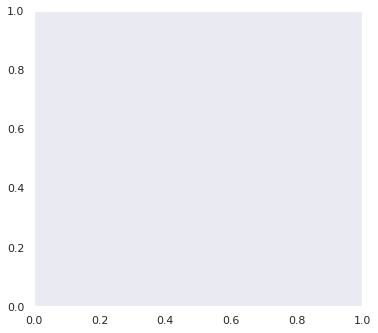

In [90]:
sns.set_theme(style='dark',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['age'],order=df['age'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')


#plt.figure(figsize=(60,65))
plt.subplot(432)
sns.countplot(df['job'],order=df['job'].value_counts().index[::-1])  
plt.xlabel('job')
plt.ylabel('count')
plt.title('Customer Conversion according to job')


#plt.figure(figsize=(60,65))
plt.subplot(433)
sns.countplot(df['marital'],order=df['marital'].value_counts().index[::-1]) 
plt.xlabel('marital')
plt.ylabel('count')     
plt.title('Customer Conversion according to martial')


#plt.figure(figsize=(60,65))
plt.subplot(434)
sns.countplot(df['qualification'],order=df['qualification'].value_counts().index[::-1])
plt.xlabel('qualification')
plt.ylabel('count')      
plt.title('Customer Conversion according to education_qulification')

#plt.figure(figsize=(60,65))
plt.subplot(435)
sns.countplot(df['call_type'],order=df['call_type'].value_counts().index[::-1])
plt.xlabel('call_type')
plt.ylabel('count') 
plt.title('Customer Conversion according to call type')

#plt.figure(figsize=(60,65))
plt.subplot(436)
sns.countplot(df['day'],order=df['day'].value_counts().index[::-1])
plt.xlabel('day')
plt.ylabel('count') 
plt.title('Customer Conversion according to day')


#plt.figure(figsize=(60,65))
plt.subplot(437)
sns.countplot(df['month'],order=df['month'].value_counts().index[::-1])
plt.xlabel('month')
plt.ylabel('count') 
plt.title('Customer Conversion according to month')

#plt.figure(figsize=(40,45))
plt.subplot(438)
sns.countplot(df['duration'],order=df['duration'].value_counts().index[::-1])
plt.xlabel('duration')
plt.ylabel('count') 
plt.title('Customer Conversion according to durations')


#plt.figure(figsize=(80,45))
plt.subplot(439)
sns.countplot(df['num_calls'],order=df['num_calls'].value_counts().index[::-1])
plt.xlabel('num_calls')
plt.ylabel('count') 
plt.title('Customer Conversiont according to number of calls')


#plt.figure(figsize=(40,45))
plt.subplot(441)
sns.countplot(df['prev_outcome'],order=df['prev_outcome'].value_counts().index[::-1])
plt.xlabel('prev_outcome')
plt.ylabel('count')   
plt.title('Customer Conversion according to prevt out come')    


#plt.figure(figsize=(40,45))
plt.subplot(442)
sns.countplot(df['final_prediction'],order=df['final_prediction'].value_counts().index[::-1])
plt.xlabel('final_prediction')
plt.ylabel('count')   
plt.title('Customer Conversion according to final_prediction') 

plt.tight_layout()



In [ ]:
sns.set_theme(style='dark',palette='pastel')
plt.figure(figsize=(30,35))

plt.subplot(241)
sns.lineplot(df['age'],df['final_prediction'])
plt.xlabel('age')
plt.ylabel('final_prediction')
plt.title('age vs final_prediction')

plt.subplot(242)
sns.lineplot(df['job'],df['final_prediction'])
plt.xlabel('job')
plt.ylabel('final_prediction')
plt.title('age vs final_prediction')

plt.subplot(243)
sns.lineplot(df['marital'],df['final_prediction'])
plt.xlabel('marital')
plt.ylabel('final_prediction')
plt.title('marital vs final_prediction')

plt.subplot(244)
sns.lineplot(df['qualification'],df['final_prediction'])
plt.xlabel('qualification')
plt.ylabel('final_prediction')
plt.title('age vs final_prediction')

plt.subplot(231)
sns.lineplot(df['call_type'],df['final_prediction'])
plt.xlabel('call_type')
plt.ylabel('final_prediction')
plt.title('call_type vs final_prediction')

plt.subplot(232)
sns.lineplot(df['day'],df['final_prediction'])
plt.xlabel('day')
plt.ylabel('final_prediction')
plt.title('day vs final_prediction')


plt.subplot(233)
sns.lineplot(df['month'],df['final_prediction'])
plt.xlabel('month')
plt.ylabel('final_prediction')
plt.title('month vs final_prediction')



plt.subplot(234)
sns.lineplot(df['duration'],df['final_prediction'])
plt.xlabel('duration')
plt.ylabel('final_prediction')
plt.title('duration vs final_prediction')



plt.subplot(235)
sns.lineplot(df['num_calls'],df['final_prediction'])
plt.xlabel('num_calls')
plt.ylabel('final_prediction')
plt.title('num_calls vs final_prediction')


plt.subplot(236)
sns.lineplot(df['prev_outcome'],df['final_prediction'])
plt.xlabel('prev_outcome')
plt.ylabel('final_prediction')
plt.title('prev_outcome vs final_prediction')

plt.tight_layout()



In [91]:
df['job'] = df['job'].map({'blue-collar':0,'management':1,'technician':2,'admin':3,'services':4,'retired':5,'self-employed':6,'entrepreneur':7,'unemployed':8,'housemaid':9,'student':10,'unknown':11})
df['marital'] = df['marital'].map({'married':0,'single':1,'divorced':2})
df['qualification'] = df['qualification'].map({'secondary ':0,'tertiary':1,'primary':2,'unknown':3})
df['call_type'] = df['call_type'].map({'cellular ':0,'unknown':1,'telephone':2})
df['month'] = df['month'].map({'may':0,'jul':1,'aug':2,'jun':3,'nov':4,'apr':5,'feb':6,'jan':7,'oct':8,'sep':9,'mar':10,'dec':11})
df['prev_outcome'] = df['prev_outcome'].map({'unknown ':0,'failure':1,'other':2,'success':3})


In [92]:
df.head()

,age,job,marital,qualification,call_type,day,month,duration,num_calls,prev_outcome,final_prediction
0,58,1.0,0,1.0,1.0,5,0,261,1,NaN,no
1,44,2.0,1,NaN,1.0,5,0,151,1,NaN,no
2,33,7.0,0,NaN,1.0,5,0,76,1,NaN,no
3,47,0.0,0,3.0,1.0,5,0,92,1,NaN,no
4,33,11.0,1,3.0,1.0,5,0,198,1,NaN,no


<Axes: xlabel='age', ylabel='count'>

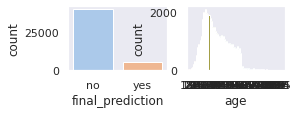

In [93]:
plt.subplot(331)
sns.countplot(x='final_prediction', data=df)
plt.subplot(332)
sns.countplot(x='age', data=df)


In [94]:
  pd.get_dummies(df.age).head()

,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,92,93,94,95
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
print(ohe)

OneHotEncoder()


In [96]:
ohe.fit_transform(df[["job","month"]]).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
seco_array = ohe.fit_transform(df[["job","month"]]).toarray()
ohe.categories_
print(seco_array)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [98]:
feature_lables = ohe.categories_

In [99]:
np.array(feature_lables).ravel()

array([ 0.,  1.,  2.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., nan,  0.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [100]:
feature_lables = np.array(feature_lables).ravel()
print(feature_lables)

[ 0.  1.  2.  4.  5.  6.  7.  8.  9. 10. 11. nan  0.  1.  2.  3.  4.  5.
  6.  7.  8.  9. 10. 11.]


In [101]:
pd.DataFrame(seco_array, columns = feature_lables)

,0.0,1.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45207,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45208,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45209,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
features = pd.DataFrame(seco_array, columns = feature_lables)
print(features)

       0.0   1.0   2.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0  11.0  NaN   \
0       0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
1       0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2       0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
3       1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4       0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
45206   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
45207   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
45208   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
45209   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
45210   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   

       0.0   1.0   2.0   3.

In [103]:
pd.concat([df, features],axis = 1)

,age,job,marital,qualification,call_type,day,month,duration,num_calls,prev_outcome,final_prediction,0.0,1.0,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,NaN,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0
0,58,1.0,0,1.0,1.0,5,0,261,1,NaN,no,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,44,2.0,1,NaN,1.0,5,0,151,1,NaN,no,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33,7.0,0,NaN,1.0,5,0,76,1,NaN,no,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47,0.0,0,3.0,1.0,5,0,92,1,NaN,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,33,11.0,1,3.0,1.0,5,0,198,1,NaN,no,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,0,1.0,NaN,17,4,977,3,NaN,yes,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45207,71,5.0,2,2.0,NaN,17,4,456,2,NaN,yes,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45208,72,5.0,0,NaN,NaN,17,4,1127,5,3.0,yes,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45209,57,0.0,0,NaN,2.0,17,4,508,4,NaN,no,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
label_encoder = LabelEncoder()
print(label_encoder)

LabelEncoder()


In [105]:
df['marital'] = label_encoder.fit_transform(df['marital'])
df.head()

,age,job,marital,qualification,call_type,day,month,duration,num_calls,prev_outcome,final_prediction
0,58,1.0,0,1.0,1.0,5,0,261,1,NaN,no
1,44,2.0,1,NaN,1.0,5,0,151,1,NaN,no
2,33,7.0,0,NaN,1.0,5,0,76,1,NaN,no
3,47,0.0,0,3.0,1.0,5,0,92,1,NaN,no
4,33,11.0,1,3.0,1.0,5,0,198,1,NaN,no


In [106]:
df['qualification'] = label_encoder.fit_transform(df['qualification'])
df.head()

,age,job,marital,qualification,call_type,day,month,duration,num_calls,prev_outcome,final_prediction
0,58,1.0,0,0,1.0,5,0,261,1,NaN,no
1,44,2.0,1,3,1.0,5,0,151,1,NaN,no
2,33,7.0,0,3,1.0,5,0,76,1,NaN,no
3,47,0.0,0,2,1.0,5,0,92,1,NaN,no
4,33,11.0,1,2,1.0,5,0,198,1,NaN,no


In [107]:
pd.get_dummies(df.call_type).head()

,1.0,2.0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [108]:
pd.get_dummies(df.day).head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [109]:
pd.get_dummies(df.month).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [110]:
pd.get_dummies(df.duration).head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1017,1018,1019,1020,1021,1022,1023,1024,10

In [111]:
pd.get_dummies(df.num_calls).head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,41,43,44,46,50,51,55,58,63
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [112]:
def split(dataframe):
  X = dataframe.drop('final_prediction',axis=1)
  y = dataframe['final_prediction']
  return X,y

In [113]:
df.dropna()

,age,job,marital,qualification,call_type,day,month,duration,num_calls,prev_outcome,final_prediction
24064,33,4.0,0,3,2.0,21,8,144,1,1.0,yes
24072,36,1.0,0,0,2.0,22,8,73,1,2.0,no
24077,36,1.0,0,0,2.0,23,8,140,1,1.0,yes
24080,56,2.0,0,3,1.0,23,8,518,1,3.0,yes
24086,44,0.0,0,3,2.0,25,8,119,1,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...
45140,63,7.0,0,3,2.0,8,4,360,1,3.0,yes
45141,77,11.0,0,2,2.0,8,4,207,1,3.0,no
45154,63,5.0,0,1,2.0,9,4,301,1,1.0,no
45166,41,8.0,1,0,2.0,9,4,394,1,3.0,yes


In [114]:
X,y = split(df)

In [115]:
X

,age,job,marital,qualification,call_type,day,month,duration,num_calls,prev_outcome
0,58,1.0,0,0,1.0,5,0,261,1,NaN
1,44,2.0,1,3,1.0,5,0,151,1,NaN
2,33,7.0,0,3,1.0,5,0,76,1,NaN
3,47,0.0,0,2,1.0,5,0,92,1,NaN
4,33,11.0,1,2,1.0,5,0,198,1,NaN
...,...,...,...,...,...,...,...,...,...,...
45206,51,2.0,0,0,NaN,17,4,977,3,NaN
45207,71,5.0,2,1,NaN,17,4,456,2,NaN
45208,72,5.0,0,3,NaN,17,4,1127,5,3.0
45209,57,0.0,0,3,2.0,17,4,508,4,NaN


In [116]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: final_prediction, Length: 45211, dtype: object

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1019)

In [118]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(31647, 10) (13564, 10) (31647,) (13564,)


In [119]:
LR=LinearRegression()

In [120]:

LR.fit(X_train,y_train)
predict_values = LR.predict(X_train)
print(mean_squared_error(y_train,predicted_values))


ValueError: ignored

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification

# generate some example data with missing values
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=1, n_classes=2, random_state=42)
X[0, 2] = np.nan
X[1, 4] = np.nan

# create and fit the model
model = HistGradientBoostingClassifier()
model.fit(X, y)

# make predictions on new data
X_test = np.random.rand(10, 5)
X_test[0, 2] = np.nan
X_test[1, 4] = np.nan
y_pred = model.predict(X_test)
